In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('C:\\Users\\Mamidi Dikshitha\\Dropbox\\My PC (DESKTOP-3K30OSM)\\Downloads\\cars_price.csv')
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [3]:
df.describe(include='all')

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
count,40000.00000,40000,40000,40000.000000,40000.000000,40000,4.000000e+04,40000,39970.000000,40000,40000,38655,36245
unique,NaN,93,991,NaN,NaN,3,NaN,3,NaN,13,2,4,9
top,NaN,volkswagen,passat,NaN,NaN,with mileage,NaN,petrol,NaN,black,mechanics,front-wheel drive,D
freq,NaN,4943,1532,NaN,NaN,39337,NaN,25869,NaN,8867,25630,27074,8985
mean,19999.50000,NaN,NaN,7430.383775,2003.485625,NaN,2.434332e+05,NaN,2103.201676,NaN,NaN,NaN,NaN
std,11547.14972,NaN,NaN,8338.242134,8.114896,NaN,3.167033e+05,NaN,938.724653,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,95.000000,1938.000000,NaN,0.000000e+00,NaN,500.000000,NaN,NaN,NaN,NaN
25%,9999.75000,NaN,NaN,2350.000000,1998.000000,NaN,1.370000e+05,NaN,1600.000000,NaN,NaN,NaN,NaN
50%,19999.50000,NaN,NaN,5350.000000,2004.000000,NaN,2.280000e+05,NaN,1995.000000,NaN,NaN,NaN,NaN
75%,29999.25000,NaN,NaN,9850.000000,2010.000000,NaN,3.087610e+05,NaN,2300.000000,NaN,NaN,NaN,NaN


In [4]:
df.shape

(40000, 13)

In [5]:
df=df.drop(['model'],axis=1)
df.describe(include='all')

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
count,40000.00000,40000,40000.000000,40000.000000,40000,4.000000e+04,40000,39970.000000,40000,40000,38655,36245
unique,NaN,93,NaN,NaN,3,NaN,3,NaN,13,2,4,9
top,NaN,volkswagen,NaN,NaN,with mileage,NaN,petrol,NaN,black,mechanics,front-wheel drive,D
freq,NaN,4943,NaN,NaN,39337,NaN,25869,NaN,8867,25630,27074,8985
mean,19999.50000,NaN,7430.383775,2003.485625,NaN,2.434332e+05,NaN,2103.201676,NaN,NaN,NaN,NaN
std,11547.14972,NaN,8338.242134,8.114896,NaN,3.167033e+05,NaN,938.724653,NaN,NaN,NaN,NaN
min,0.00000,NaN,95.000000,1938.000000,NaN,0.000000e+00,NaN,500.000000,NaN,NaN,NaN,NaN
25%,9999.75000,NaN,2350.000000,1998.000000,NaN,1.370000e+05,NaN,1600.000000,NaN,NaN,NaN,NaN
50%,19999.50000,NaN,5350.000000,2004.000000,NaN,2.280000e+05,NaN,1995.000000,NaN,NaN,NaN,NaN
75%,29999.25000,NaN,9850.000000,2010.000000,NaN,3.087610e+05,NaN,2300.000000,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

Unnamed: 0                0
make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [7]:
df['volume(cm3)'].fillna(df['volume(cm3)'].mean(), axis=0, inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0                0
make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)               0
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [9]:
df['drive_unit'] = df['drive_unit'].replace(np.nan, 'unknown')
df['segment'] = df['segment'].replace(np.nan, 'unknown')

In [10]:
df.isnull().sum()

Unnamed: 0             0
make                   0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
dtype: int64

In [11]:
new_df=df

In [12]:
new_df.head()

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [13]:
new_df.describe(include='all')

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
count,40000.00000,40000,40000.000000,40000.000000,40000,4.000000e+04,40000,40000.000000,40000,40000,40000,40000
unique,NaN,93,NaN,NaN,3,NaN,3,NaN,13,2,5,10
top,NaN,volkswagen,NaN,NaN,with mileage,NaN,petrol,NaN,black,mechanics,front-wheel drive,D
freq,NaN,4943,NaN,NaN,39337,NaN,25869,NaN,8867,25630,27074,8985
mean,19999.50000,NaN,7430.383775,2003.485625,NaN,2.434332e+05,NaN,2103.201676,NaN,NaN,NaN,NaN
std,11547.14972,NaN,8338.242134,8.114896,NaN,3.167033e+05,NaN,938.372556,NaN,NaN,NaN,NaN
min,0.00000,NaN,95.000000,1938.000000,NaN,0.000000e+00,NaN,500.000000,NaN,NaN,NaN,NaN
25%,9999.75000,NaN,2350.000000,1998.000000,NaN,1.370000e+05,NaN,1600.000000,NaN,NaN,NaN,NaN
50%,19999.50000,NaN,5350.000000,2004.000000,NaN,2.280000e+05,NaN,1996.000000,NaN,NaN,NaN,NaN
75%,29999.25000,NaN,9850.000000,2010.000000,NaN,3.087610e+05,NaN,2300.000000,NaN,NaN,NaN,NaN


In [14]:
new_df["zscore"]=(new_df.priceUSD-new_df.priceUSD.mean())/new_df.priceUSD.std()
new_df.head()

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,zscore
0,0,honda,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,-0.823361
1,1,ford,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,-0.225513
2,2,nissan,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,0.104293
3,3,volkswagen,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,-0.495354
4,4,nissan,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,-0.597294


In [15]:
new_df[new_df["zscore"]>3]

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,zscore
12,12,toyota,42500,2014,with mileage,200000.0,diesel,4500.0,white,auto,all-wheel drive,J,4.205876
42,42,volvo,38000,2015,with mileage,134000.0,diesel,2000.0,brown,auto,all-wheel drive,J,3.666194
268,268,bmw,33000,2011,with mileage,92000.0,petrol,3500.0,black,auto,all-wheel drive,J,3.066548
400,400,maserati,39900,2010,with mileage,67000.0,petrol,4800.0,black,auto,rear drive,unknown,3.894060
640,640,mercedes-benz,44800,2015,with mileage,66500.0,diesel,3000.0,black,auto,all-wheel drive,J,4.481714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39687,39687,lexus,35150,2017,with mileage,8950.0,petrol,2000.0,gray,auto,part-time four-wheel drive,unknown,3.324396
39715,39715,bmw,59000,2016,with mileage,50000.0,diesel,3000.0,white,auto,all-wheel drive,J,6.184711
39751,39751,audi,59900,2015,with mileage,49100.0,petrol,4000.0,black,auto,all-wheel drive,unknown,6.292647
39959,39959,mclaren,121500,2013,with mileage,29300.0,petrol,3800.0,blue,auto,rear drive,unknown,13.680295


In [16]:
new_df[new_df["zscore"]<3]

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,zscore
0,0,honda,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,-0.823361
1,1,ford,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,-0.225513
2,2,nissan,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,0.104293
3,3,volkswagen,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,-0.495354
4,4,nissan,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,-0.597294
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,jeep,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J,0.607996
39996,39996,peugeot,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E,-0.320977
39997,39997,mercedes-benz,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D,-0.411404
39998,39998,proton,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,unknown,-0.747206


In [17]:
new_df[(new_df.zscore)<-3] | new_df[(new_df.zscore)>3]

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,zscore
12,False,False,False,False,False,False,False,False,False,False,False,False,False
42,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False
400,False,False,False,False,False,False,False,False,False,False,False,False,False
640,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39687,False,False,False,False,False,False,False,False,False,False,False,False,False
39715,False,False,False,False,False,False,False,False,False,False,False,False,False
39751,False,False,False,False,False,False,False,False,False,False,False,False,False
39959,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
data_no_outliers=new_df[(new_df.zscore>-3) & (new_df.zscore<3)]
data_no_outliers.head()

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,zscore
0,0,honda,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,-0.823361
1,1,ford,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,-0.225513
2,2,nissan,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,0.104293
3,3,volkswagen,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,-0.495354
4,4,nissan,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,-0.597294


In [19]:
new_df.shape[0]-data_no_outliers.shape[0]

622

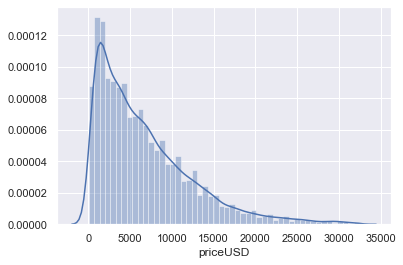

In [20]:
sns.distplot(data_no_outliers['priceUSD'])

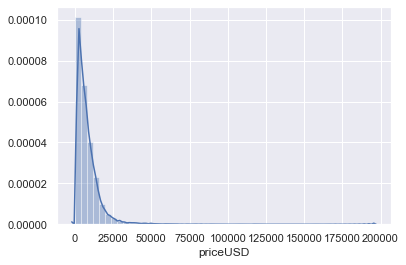

In [21]:
sns.distplot(new_df['priceUSD'])

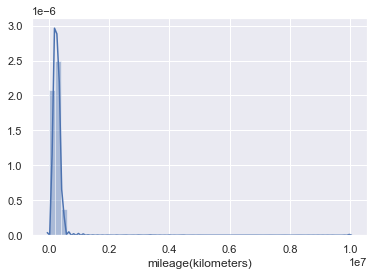

In [22]:
sns.distplot(new_df['mileage(kilometers)'])

In [23]:
q=new_df['mileage(kilometers)'].quantile(0.99)
data_2=new_df[new_df['mileage(kilometers)']<q]

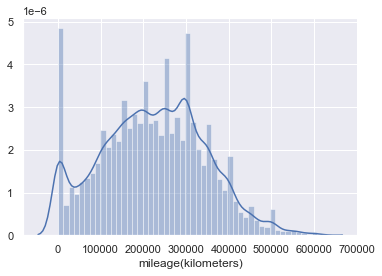

In [24]:
sns.distplot(data_2['mileage(kilometers)'])

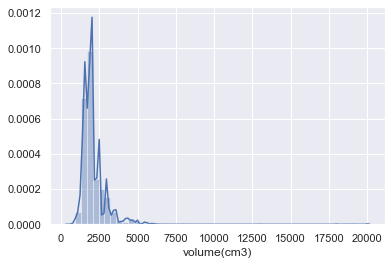

In [25]:
sns.distplot(new_df['volume(cm3)'])

In [26]:
data_3=new_df[new_df['volume(cm3)']<6.5]

C:\Users\Mamidi Dikshitha\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Mamidi Dikshitha\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Mamidi Dikshitha\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


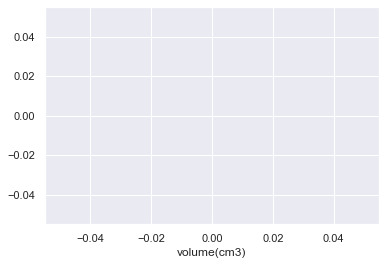

In [27]:
sns.distplot(data_3['volume(cm3)'])

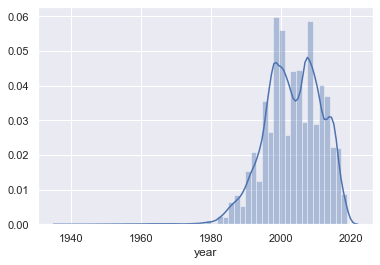

In [28]:
sns.distplot(new_df['year'])

In [29]:
q=new_df['year'].quantile(0.01)
data_4=new_df[new_df['year']>q]

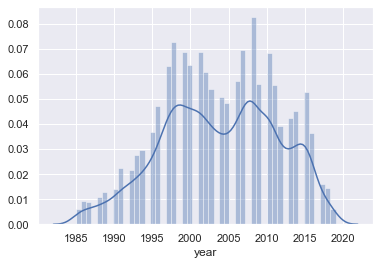

In [30]:
sns.distplot(data_4['year'])

In [31]:
data_cleaned=data_4.reset_index(drop=True)

In [32]:
data_cleaned.head()

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,zscore
0,0,honda,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,-0.823361
1,1,ford,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,-0.225513
2,2,nissan,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,0.104293
3,3,volkswagen,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,-0.495354
4,4,nissan,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,-0.597294


In [33]:
data_cleaned.describe(include='all')

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,zscore
count,39485.000000,39485,39485.000000,39485.000000,39485,3.948500e+04,39485,39485.000000,39485,39485,39485,39485,39485.000000
unique,NaN,92,NaN,NaN,3,NaN,3,NaN,13,2,5,10,NaN
top,NaN,volkswagen,NaN,NaN,with mileage,NaN,petrol,NaN,black,mechanics,front-wheel drive,D,NaN
freq,NaN,4890,NaN,NaN,38862,NaN,25442,NaN,8833,25129,26934,8933,NaN
mean,20002.904926,NaN,7502.799038,2003.816386,NaN,2.429412e+05,NaN,2105.112145,NaN,NaN,NaN,NaN,0.008685
std,11542.983034,NaN,8359.130546,7.569973,NaN,3.088726e+05,NaN,935.644560,NaN,NaN,NaN,NaN,1.002505
min,0.000000,NaN,95.000000,1985.000000,NaN,0.000000e+00,NaN,500.000000,NaN,NaN,NaN,NaN,-0.879728
25%,10013.000000,NaN,2450.000000,1998.000000,NaN,1.380080e+05,NaN,1600.000000,NaN,NaN,NaN,NaN,-0.597294
50%,19999.000000,NaN,5499.000000,2004.000000,NaN,2.290000e+05,NaN,1997.000000,NaN,NaN,NaN,NaN,-0.231630
75%,29996.000000,NaN,9900.000000,2010.000000,NaN,3.086600e+05,NaN,2300.000000,NaN,NaN,NaN,NaN,0.296179


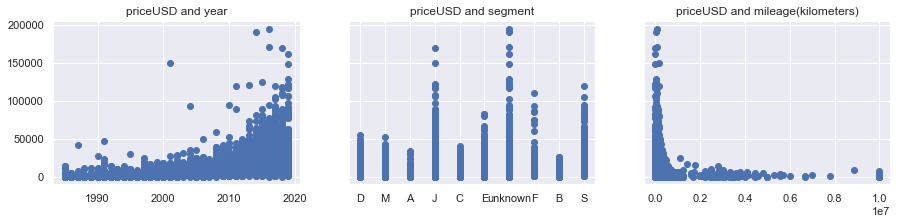

In [34]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['year'],data_cleaned['priceUSD'])
ax1.set_title('priceUSD and year')
ax2.scatter(data_cleaned['segment'],data_cleaned['priceUSD'])
ax2.set_title('priceUSD and segment')
ax3.scatter(data_cleaned['mileage(kilometers)'],data_cleaned['priceUSD'])
ax3.set_title('priceUSD and mileage(kilometers)')
plt.show()

In [35]:
log_price=np.log(data_cleaned['priceUSD'])
data_cleaned['log_price']=log_price
data_cleaned

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,zscore,log_price
0,0,honda,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,-0.823361,6.336826
1,1,ford,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,-0.225513,8.621553
2,2,nissan,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,0.104293,9.024011
3,3,volkswagen,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,-0.495354,8.101678
4,4,nissan,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,-0.597294,7.803843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39480,39995,jeep,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J,0.607996,9.433484
39481,39996,peugeot,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E,-0.320977,8.466742
39482,39997,mercedes-benz,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D,-0.411404,8.294050
39483,39998,proton,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,unknown,-0.747206,7.090077


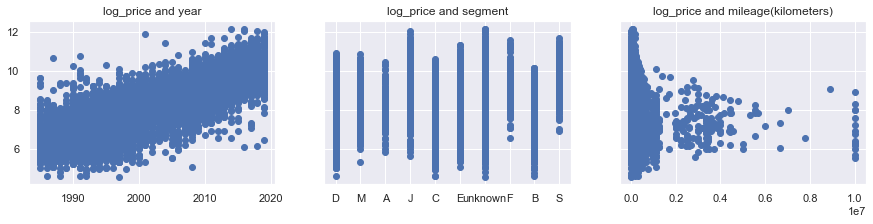

In [36]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['year'],data_cleaned['log_price'])
ax1.set_title('log_price and year')
ax2.scatter(data_cleaned['segment'],data_cleaned['log_price'])
ax2.set_title('log_price and segment')
ax3.scatter(data_cleaned['mileage(kilometers)'],data_cleaned['log_price'])
ax3.set_title('log_price and mileage(kilometers)')
plt.show()

In [37]:
data_cleaned=data_cleaned.drop(['priceUSD'],axis=1)

In [38]:
data_cleaned.columns.values

array(['Unnamed: 0', 'make', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'segment', 'zscore', 'log_price'], dtype=object)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['mileage(kilometers)','year','volume(cm3)']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"]=variables.columns

In [40]:
vif

,VIF,features
0,1.616730,mileage(kilometers)
1,6.615163,year
2,6.066611,volume(cm3)


In [41]:
data_no_multicollinearity=data_cleaned.drop(['year'],axis=1)

In [42]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [43]:
data_with_dummies.head()

,Unnamed: 0,mileage(kilometers),volume(cm3),zscore,log_price,make_alfa-romeo,make_aro,make_aston-martin,make_audi,make_bentley,make_bmw,make_bogdan,make_buick,make_byd,make_cadillac,make_changan,make_chery,make_chevrolet,make_chrysler,make_citroen,make_dacia,make_daewoo,make_daihatsu,make_datsun,make_dong-feng,make_eksklyuziv,make_faw,make_fiat,make_ford,make_gaz,make_geely,make_gmc,make_great-wall,make_hafei,make_haval,make_honda,make_hyundai,make_infiniti,make_iran-khodro,make_isuzu,make_izh,make_jac,make_jaguar,make_jeep,make_kia,make_lada-vaz,make_lancia,make_land-rover,make_lexus,make_lifan,make_lincoln,make_luaz,make_maserati,make_mazda,make_mclaren,make_mercedes-benz,make_mercury,make_mg,make_mini,make_mitsubishi,make_moskvich,make_nissan,make_oldsmobile,make_opel,make_peugeot,make_plymouth,make_pontiac,make_porsche,make_proton,make_raf,make_ravon,make_renault,make_roewe,make_rover,make_saab,make_saipa,make_saturn,make_scion,make_seat,make_shanghai-maple,make_skoda,make_smart,make_ssangyong,make_subaru,make_suzuki,make_tagaz,make_tata,make_tesla,make_toyota,make_uaz,make_volkswagen,make_volvo,make_vortex,make_wartburg,make_zaz,make_zotye,condition_with damage,condition_with mileage,fuel_type_electrocar,fuel_type_petrol,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow,transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive,drive_unit_unknown,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S,segment_unknown
0,0,960015.0,2000.0,-0.823361,6.336826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,172000.0,1400.0,-0.225513,8.621553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,223000.0,2500.0,0.104293,9.024011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,3,140000.0,1200.0,-0.495354,8.101678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,413000.0,2200.0,-0.597294,7.803843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_with_dummies[['mileage(kilometers)','volume(cm3)']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"]=variables.columns

In [45]:
vif

,VIF,features
0,1.482125,mileage(kilometers)
1,1.482125,volume(cm3)


In [46]:
data_with_dummies.columns.values

array(['Unnamed: 0', 'mileage(kilometers)', 'volume(cm3)', 'zscore',
       'log_price', 'make_alfa-romeo', 'make_aro', 'make_aston-martin',
       'make_audi', 'make_bentley', 'make_bmw', 'make_bogdan',
       'make_buick', 'make_byd', 'make_cadillac', 'make_changan',
       'make_chery', 'make_chevrolet', 'make_chrysler', 'make_citroen',
       'make_dacia', 'make_daewoo', 'make_daihatsu', 'make_datsun',
       'make_dong-feng', 'make_eksklyuziv', 'make_faw', 'make_fiat',
       'make_ford', 'make_gaz', 'make_geely', 'make_gmc',
       'make_great-wall', 'make_hafei', 'make_haval', 'make_honda',
       'make_hyundai', 'make_infiniti', 'make_iran-khodro', 'make_isuzu',
       'make_izh', 'make_jac', 'make_jaguar', 'make_jeep', 'make_kia',
       'make_lada-vaz', 'make_lancia', 'make_land-rover', 'make_lexus',
       'make_lifan', 'make_lincoln', 'make_luaz', 'make_maserati',
       'make_mazda', 'make_mclaren', 'make_mercedes-benz', 'make_mercury',
       'make_mg', 'make_mini', 'make

In [47]:
cols=['log_price', 'mileage(kilometers)', 'volume(cm3)','log_price', 'zscore',
       'make_alfa-romeo', 'make_aro', 'make_aston-martin',
       'make_audi', 'make_bentley', 'make_bmw', 'make_bogdan',
       'make_buick', 'make_byd', 'make_cadillac', 'make_changan',
       'make_chery', 'make_chevrolet', 'make_chrysler', 'make_citroen',
       'make_dacia', 'make_daewoo', 'make_daihatsu', 'make_datsun',
       'make_dong-feng', 'make_eksklyuziv', 'make_faw', 'make_fiat',
       'make_ford', 'make_gaz', 'make_geely', 'make_gmc',
       'make_great-wall', 'make_hafei', 'make_haval', 'make_honda',
       'make_hyundai', 'make_infiniti', 'make_iran-khodro', 'make_isuzu',
       'make_izh', 'make_jac', 'make_jaguar', 'make_jeep', 'make_kia',
       'make_lada-vaz', 'make_lancia', 'make_land-rover', 'make_lexus',
       'make_lifan', 'make_lincoln', 'make_luaz', 'make_maserati',
       'make_mazda', 'make_mclaren', 'make_mercedes-benz', 'make_mercury',
       'make_mg', 'make_mini', 'make_mitsubishi', 'make_moskvich',
       'make_nissan', 'make_oldsmobile', 'make_opel', 'make_peugeot',
       'make_plymouth', 'make_pontiac', 'make_porsche', 'make_proton',
       'make_raf', 'make_ravon', 'make_renault', 'make_roewe',
       'make_rover', 'make_saab', 'make_saipa', 'make_saturn',
       'make_scion', 'make_seat', 'make_shanghai-maple', 'make_skoda',
       'make_smart', 'make_ssangyong', 'make_subaru', 'make_suzuki',
       'make_tagaz', 'make_tata', 'make_tesla', 'make_toyota', 'make_uaz',
       'make_volkswagen', 'make_volvo', 'make_vortex', 'make_wartburg',
       'make_zaz', 'make_zotye', 'condition_with damage',
       'condition_with mileage', 'fuel_type_electrocar',
       'fuel_type_petrol', 'color_blue', 'color_brown', 'color_burgundy',
       'color_gray', 'color_green', 'color_orange', 'color_other',
       'color_purple', 'color_red', 'color_silver', 'color_white',
       'color_yellow', 'transmission_mechanics',
       'drive_unit_front-wheel drive',
       'drive_unit_part-time four-wheel drive', 'drive_unit_rear drive',
       'drive_unit_unknown', 'segment_B', 'segment_C', 'segment_D',
       'segment_E', 'segment_F', 'segment_J', 'segment_M', 'segment_S',
       'segment_unknown']

In [48]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,mileage(kilometers),volume(cm3),log_price,zscore,make_alfa-romeo,make_aro,make_aston-martin,make_audi,make_bentley,make_bmw,make_bogdan,make_buick,make_byd,make_cadillac,make_changan,make_chery,make_chevrolet,make_chrysler,make_citroen,make_dacia,make_daewoo,make_daihatsu,make_datsun,make_dong-feng,make_eksklyuziv,make_faw,make_fiat,make_ford,make_gaz,make_geely,make_gmc,make_great-wall,make_hafei,make_haval,make_honda,make_hyundai,make_infiniti,make_iran-khodro,make_isuzu,make_izh,make_jac,make_jaguar,make_jeep,make_kia,make_lada-vaz,make_lancia,make_land-rover,make_lexus,make_lifan,make_lincoln,make_luaz,make_maserati,make_mazda,make_mclaren,make_mercedes-benz,make_mercury,make_mg,make_mini,make_mitsubishi,make_moskvich,make_nissan,make_oldsmobile,make_opel,make_peugeot,make_plymouth,make_pontiac,make_porsche,make_proton,make_raf,make_ravon,make_renault,make_roewe,make_rover,make_saab,make_saipa,make_saturn,make_scion,make_seat,make_shanghai-maple,make_skoda,make_smart,make_ssangyong,make_subaru,make_suzuki,make_tagaz,make_tata,make_tesla,make_toyota,make_uaz,make_volkswagen,make_volvo,make_vortex,make_wartburg,make_zaz,make_zotye,condition_with damage,condition_with mileage,fuel_type_electrocar,fuel_type_petrol,color_blue,color_brown,color_burgundy,color_gray,color_green,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow,transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive,drive_unit_unknown,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S,segment_unknown
0,6.336826,960015.0,2000.0,6.336826,-0.823361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1,8.621553,172000.0,1400.0,8.621553,-0.225513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,9.024011,223000.0,2500.0,9.024011,0.104293,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,8.101678,140000.0,1200.0,8.101678,-0.495354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,7.803843,413000.0,2200.0,7.803843,-0.597294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [49]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [51]:
inputs_scaled=scaler.transform(inputs)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=35)

In [53]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [54]:
y_hat=reg.predict(x_train)

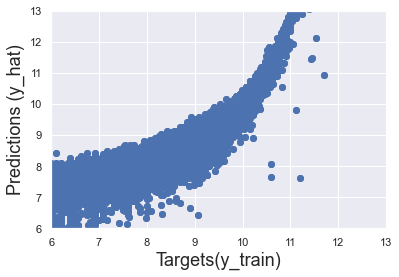

In [55]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

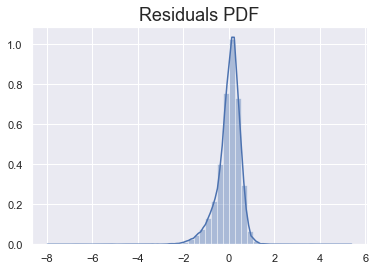

In [56]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF',size=18)